
## JOSÉ LUIS PADILLA VALENZUELA
#### Modulo 7 Random Forest


En el siguiente código se muestra cómo realizar una validación pero esta vez sin optimizar los parámetros del modelo. Para optimizar los parámetros se utilizaba GridSearchCV, que prueba todas las combinaciones de los parámetros (GridSearch) validándolos con validación cruzada (CV, de cross validation). 

En este caso simplemente se validan los parámetros por defecto con la función RepeatedKFold.

In [1]:
import numpy as np 
from numpy import mean, std 
import sklearn as skl
from sklearn.ensemble import RandomForestRegressor   
from sklearn.datasets import make_regression  # 
from sklearn.model_selection import cross_val_score, RepeatedKFold  #
import matplotlib.pyplot as plt

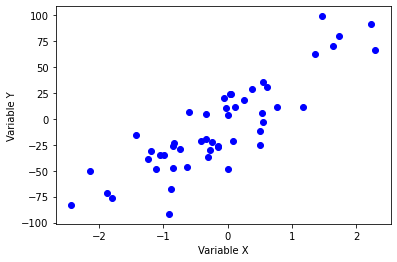

In [2]:
# Definición de un dataset con solo 1 feature
X, y = make_regression(n_samples = 50, n_features = 1, n_informative = 15, noise = 20, random_state = 2)
plt.scatter (X, y, color = 'blue')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

In [3]:
# Definicion del modelo
model = RandomForestRegressor()

# Evaluacion del modelo
cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 1)
n_scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1, error_score = 'raise')

# obtencion de una metrica de rendimiento
print(u'Se obtiene el error absoluto medio (MAE): %.3f, desviacion %.3f' %(mean(n_scores), std(n_scores)))

Se obtiene el error absoluto medio (MAE): -19.315, desviacion 6.387


In [4]:
# ajuste del modelo a los datos
model.fit(X, y)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
y_prediccion = model.predict(X_grid)

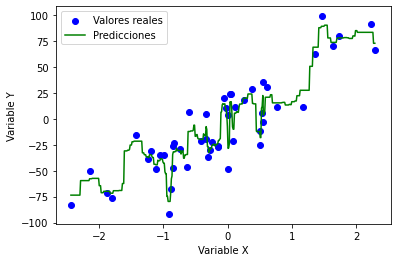

In [5]:
# visualizacion de los resultados del Ramdom forest regressor
plt.scatter(X, y, color = 'blue', label = 'Valores reales')
plt.plot(X_grid, y_prediccion, color = 'green', label='Predicciones')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.legend()
plt.show()

Se muestra en verde la estimación del Random forest con los parámetros por defecto. Incluso no habiendo optimizado los parámetros, los resultados son relativamente buenos; esto es debido a que es un método que generaliza muy bien. Independientemente, se recomienda siempre que sea posible optimizar los parámetros con GridSearch.

3.4.5. Consideraciones prácticas
El rendimiento de los bosques aleatorios es de los mejores dentro del aprendizaje automático.
Es un algoritmo que no tiende a sobreajustar.
Es fácilmente paralelizable, por lo que si se cuenta con un clúster de varios ordenadores es posible calcularlo mucho más rápido.
Son muy rápidos de calcular ya que se forman con árboles de decisión en paralelo.


3.4.6. Cuándo utilizarlo
Los bosques aleatorios son uno de los mejores algoritmos actualmente, por lo que es una buena opción en la mayoría de los problemas.

Existen casos donde este hecho es más notable:

1- En los casos en los que no sea necesaria una interpretación de los datos, es uno de los mejores algoritmos por rendimiento y por rapidez de cálculo.

2- Si se dispone de varias máquinas se puede aprovechar la paralelización para calcular cientos o miles de árboles al mismo tiempo.
